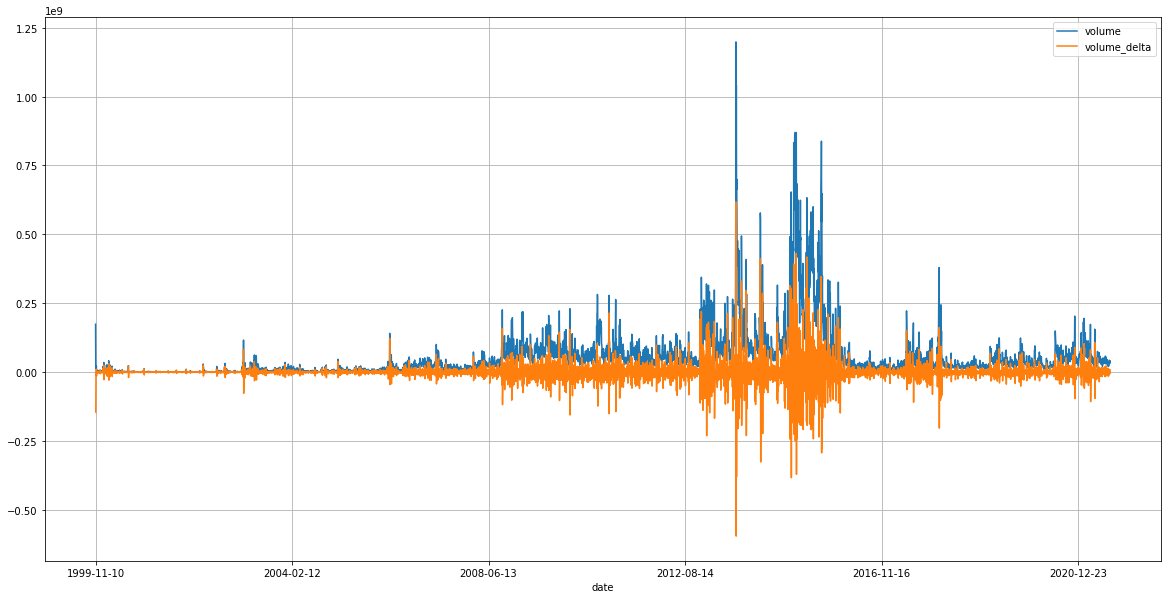

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

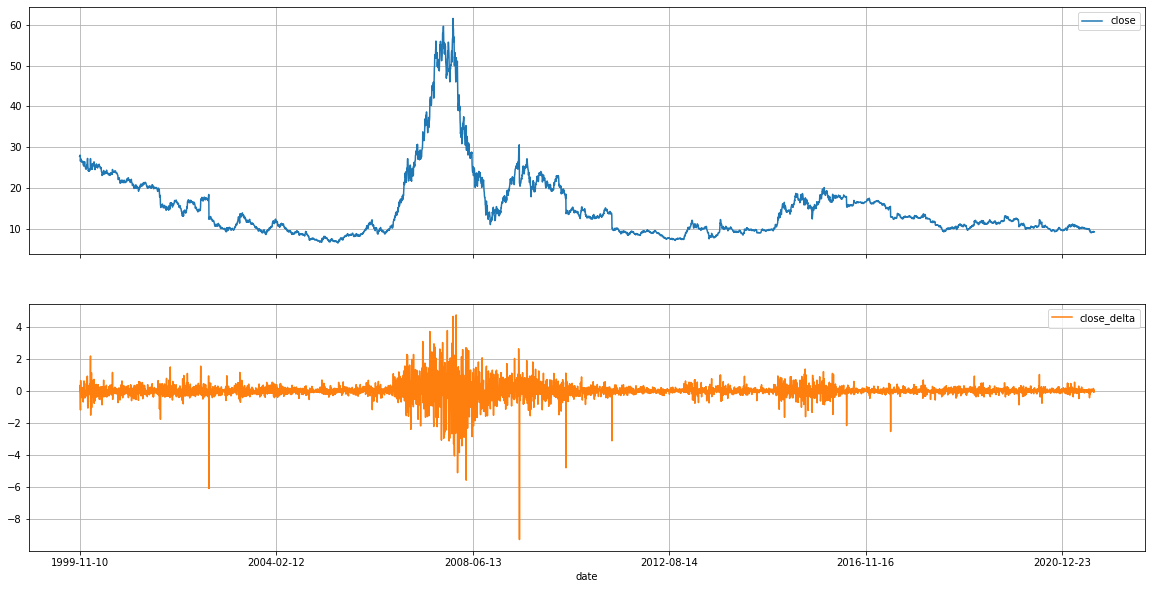

In [23]:
import pandas as pd
import stockstats
from stockstats import StockDataFrame
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#date close	high low open volume amount
data: pd.DataFrame = pd.read_csv("C:/Users/zhangyunqi/PycharmProjects/pystock/data/stock/0600000.csv"
                                 , encoding="GBK"
                                 , usecols=["日期", "收盘价", "最高价", "最低价", "开盘价", "成交量"])
# 过滤停牌的交易日，条件"收盘价","最高价","最低价","开盘价","成交量"均为0
data = data[(data["收盘价"] != 0) & (data["最高价"] != 0)
            & (data["最低价"] != 0) & (data["开盘价"] != 0)
            & (data["成交量"] != 0)]
# 修改列
data.rename(columns={'日期': 'date', '收盘价': 'close', '最高价': 'high', '最低价': 'low', '开盘价': 'open', '成交量': 'volume'}
            , inplace=True)
# 将数据倒序输出
data = data.reindex(index=data.index[::-1])
stock = StockDataFrame.retype(data)
stock

In [16]:
# 交易量增量
stock['volume_delta']
#
stock['open_2_d']
stock['cr-ma1']
stock['rsi_6']


date
1999-11-10          NaN
1999-11-11     0.000000
1999-11-12    91.071429
1999-11-15    46.363636
1999-11-16    13.813651
                ...    
2021-08-18    68.529471
2021-08-19    51.108892
2021-08-20    56.425764
2021-08-23    45.935350
2021-08-24    47.605234
Name: rsi_6, Length: 5164, dtype: float64

<AxesSubplot:xlabel='date'>

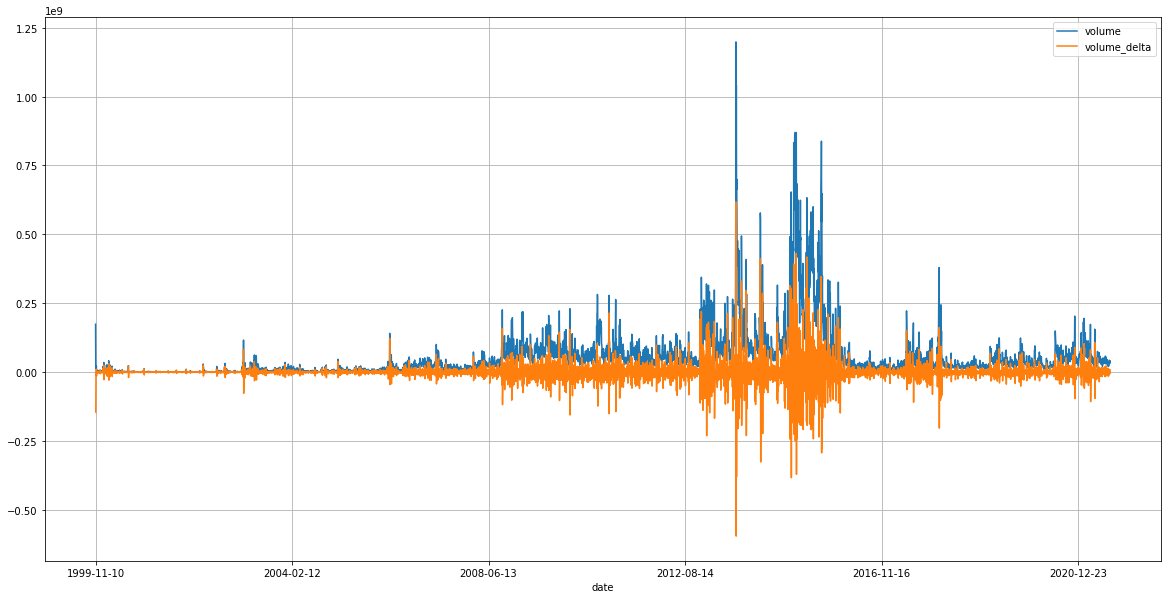

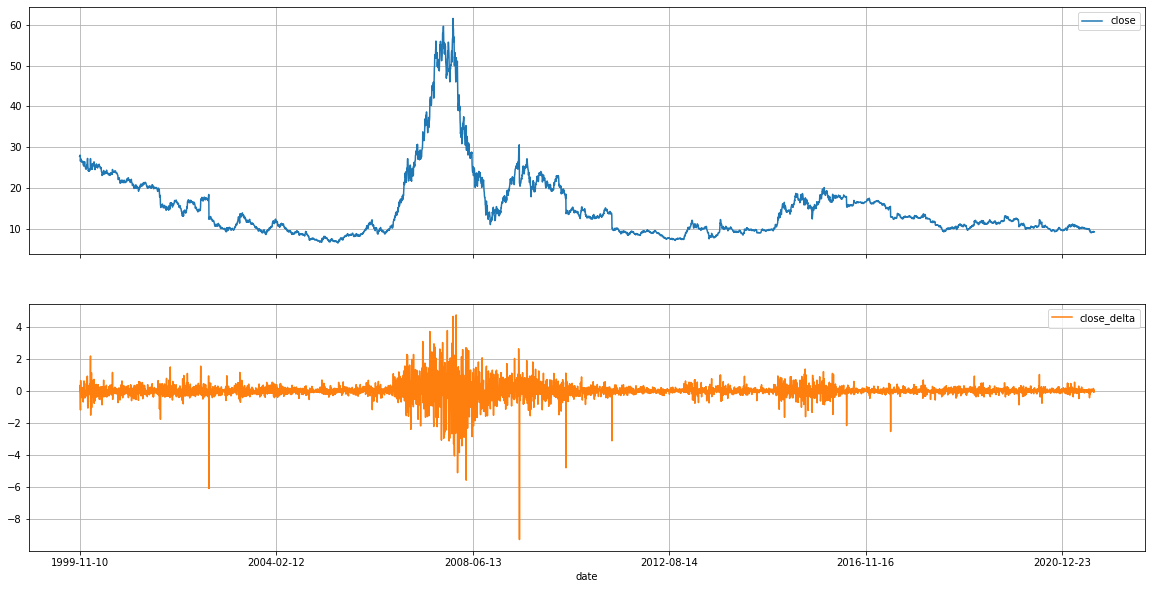

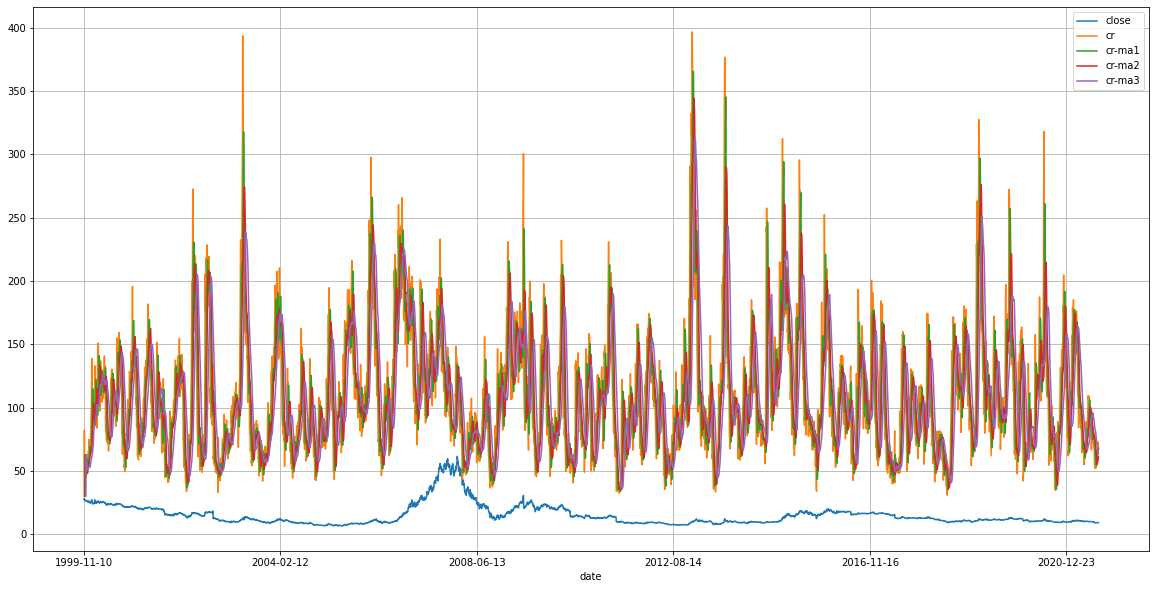

In [28]:
stock[['volume','volume_delta']].plot(figsize=(20,10),grid=True)
stock[['close','close_delta']].plot(subplots=True,figsize=(20,10),grid=True)
stock[['close','cr','cr-ma1','cr-ma2','cr-ma3']].plot(figsize=(20,10),grid=True)